In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("chennai_reservoir_levels.csv",index_col='Date',parse_dates=True)

In [3]:
data.head()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2004-01-01,3.9,0.0,268.0,0.0
2004-02-01,3.9,0.0,268.0,0.0
2004-03-01,3.9,0.0,267.0,0.0
2004-04-01,3.9,0.0,267.0,0.0
2004-05-01,3.8,0.0,267.0,0.0


In [4]:
data.shape

(6182, 4)

In [5]:
data=data.dropna()

In [6]:
data.shape

(6182, 4)

<AxesSubplot:xlabel='Date'>

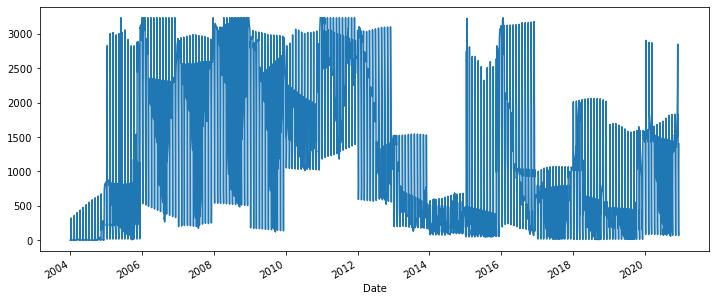

In [7]:
data['POONDI'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

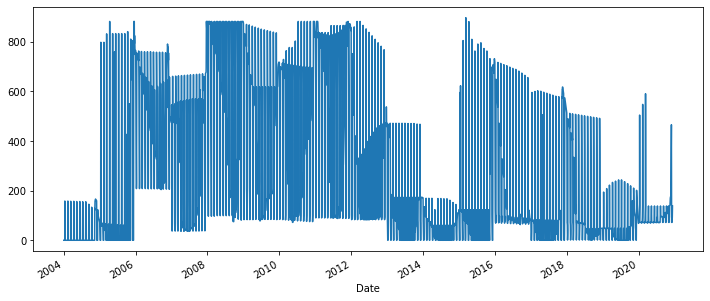

In [8]:
data['CHOLAVARAM'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

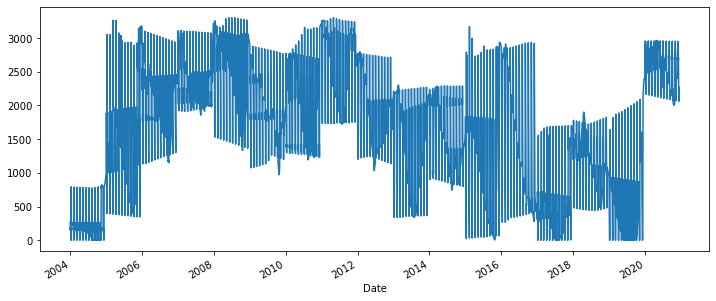

In [9]:
data['REDHILLS'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

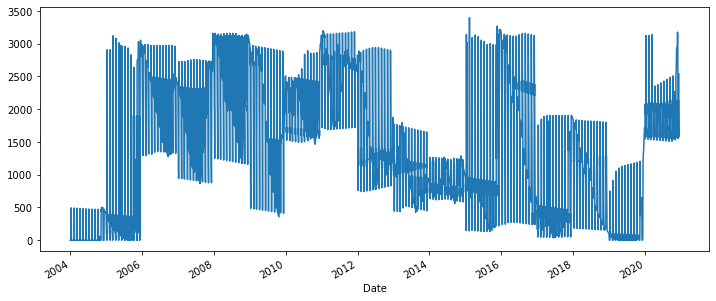

In [10]:
data['CHEMBARAMBAKKAM'].plot(figsize=(12,5))

In [11]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    datatest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",datatest[0])
    print("2. P-Value : ",datatest[1])
    print("3. : ",datatest[2])
    print("4. : ",datatest[3])
    print("5. Critical Values : ")
    for key,val in datatest[4].items():
        print("\t",key,": ",val)

In [12]:
ad_test(data['POONDI'])

1. ADF :  -3.949555265857684
2. P-Value :  0.0016989519693194348
3. :  15
4. :  6166
5. Critical Values : 
	 1% :  -3.4314109835286453
	 5% :  -2.8620088595072937
	 10% :  -2.567019571125975


In [13]:
ad_test(data['CHOLAVARAM'])

1. ADF :  -4.167171769327193
2. P-Value :  0.0007484740944299089
3. :  11
4. :  6170
5. Critical Values : 
	 1% :  -3.431410295408432
	 5% :  -2.8620085554741395
	 10% :  -2.567019409281592


In [14]:
ad_test(data['REDHILLS'])

1. ADF :  -4.143432921458717
2. P-Value :  0.0008202393949611995
3. :  16
4. :  6165
5. Critical Values : 
	 1% :  -3.4314111556982785
	 5% :  -2.862008935577242
	 10% :  -2.567019611619896


In [15]:
ad_test(data['CHEMBARAMBAKKAM'])

1. ADF :  -3.4844903521549493
2. P-Value :  0.00839446417866382
3. :  16
4. :  6165
5. Critical Values : 
	 1% :  -3.4314111556982785
	 5% :  -2.862008935577242
	 10% :  -2.567019611619896


In [16]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [17]:
stepwise_fit = auto_arima(data['POONDI'], trace =  True, supress_warnings =  True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=70677.939, Time=3.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=71577.841, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=70931.953, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=70991.310, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=71576.053, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=70678.474, Time=2.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=70926.817, Time=2.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=70679.931, Time=6.87 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=70680.080, Time=7.87 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=70930.874, Time=0.70 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=70677.919, Time=4.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=70855.154, Time=0.84 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=70679.902, Time=5.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=70899.146, Time=1.54 sec
 ARIMA(0,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6182
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -35333.047
Date:                Mon, 19 Jul 2021   AIC                          70676.093
Time:                        21:10:44   BIC                          70709.740
Sample:                             0   HQIC                         70687.760
                               - 6182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9318      0.012     77.932      0.000       0.908       0.955
ma.L1         -1.2923      0.012   -107.739      0.000      -1.316      -1.269
ma.L2          0.4181      0.005     88.039      0.000       0.409       0.427
ma.L3         -0.0224      0.003     -7.044      0.000      -0.029      -0.016
sigma2      5403.4520      5.580    968.356      0.000    5392.515    5414.389
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         132149555.93
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            11.87
Prob(H) (two-sided):                  0.00   Kurtosis:                       718.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
stepwise_fit = auto_arima(data['CHOLAVARAM'], trace =  True, supress_warnings =  True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=55710.306, Time=4.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=56159.635, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=55842.799, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=55877.660, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=56157.744, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=55709.694, Time=2.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=55834.272, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=55839.780, Time=1.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=55710.823, Time=4.46 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=55834.286, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=55719.616, Time=2.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=55707.100, Time=6.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=55701.711, Time=9.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=55723.301, Time=3.57 sec
 ARIMA(4,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6182
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -27842.126
Date:                Mon, 19 Jul 2021   AIC                          55698.251
Time:                        21:13:11   BIC                          55745.356
Sample:                             0   HQIC                         55714.585
                               - 6182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0757      0.133      8.103      0.000       0.816       1.336
ar.L2         -0.0828      0.088     -0.945      0.345      -0.254       0.089
ar.L3         -0.0968      0.030     -3.213      0.001      -0.156      -0.038
ar.L4          0.0417      0.008      5.178      0.000       0.026       0.058
ma.L1         -1.3161      0.133     -9.907      0.000      -1.576      -1.056
ma.L2          0.4091      0.119      3.428      0.001       0.175       0.643
sigma2       478.6726      0.701    683.239      0.000     477.299     480.046
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          39973934.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             6.09
Prob(H) (two-sided):                  0.00   Kurtosis:                       396.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
stepwise_fit = auto_arima(data['REDHILLS'], trace =  True, supress_warnings =  True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=66659.415, Time=4.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=67506.570, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=67038.681, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=67100.730, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=67504.911, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=66657.635, Time=2.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=66996.000, Time=1.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=67040.099, Time=1.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=66659.418, Time=3.80 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=66932.249, Time=2.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=66756.447, Time=3.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=66661.199, Time=4.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=66655.784, Time=1.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=66994.528, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6182
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -33323.892
Date:                Mon, 19 Jul 2021   AIC                          66655.784
Time:                        21:13:45   BIC                          66682.701
Sample:                             0   HQIC                         66665.118
                               - 6182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9333      0.006    164.657      0.000       0.922       0.944
ma.L1         -1.2556      0.006   -209.340      0.000      -1.267      -1.244
ma.L2          0.3752      0.002    162.771      0.000       0.371       0.380
sigma2      2820.7106      3.623    778.547      0.000    2813.610    2827.812
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):          59702716.90
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             8.33
Prob(H) (two-sided):                  0.00   Kurtosis:                       484.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
stepwise_fit = auto_arima(data['CHEMBARAMBAKKAM'], trace =  True, supress_warnings =  True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=71417.294, Time=2.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=71952.176, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=71427.749, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=71425.617, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=71950.415, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=71415.397, Time=1.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=71419.573, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=71418.384, Time=0.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=71342.377, Time=5.60 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=71420.162, Time=0.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=71318.060, Time=5.77 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=71400.917, Time=0.87 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=71319.777, Time=6.92 sec
 ARIMA(1,1,5)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6182
Model:               SARIMAX(1, 1, 4)   Log Likelihood              -35652.130
Date:                Mon, 19 Jul 2021   AIC                          71316.259
Time:                        21:14:52   BIC                          71356.635
Sample:                             0   HQIC                         71330.259
                               - 6182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9363      0.013     73.078      0.000       0.911       0.961
ma.L1         -1.2488      0.013    -97.455      0.000      -1.274      -1.224
ma.L2          0.3242      0.005     66.725      0.000       0.315       0.334
ma.L3         -0.0671      0.005    -14.363      0.000      -0.076      -0.058
ma.L4          0.0687      0.004     19.339      0.000       0.062       0.076
sigma2      5991.6663      7.681    780.082      0.000    5976.612    6006.720
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          61419471.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             8.01
Prob(H) (two-sided):                  0.00   Kurtosis:                       491.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
print(data.shape)

(6182, 4)


In [23]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]
print(train.shape,test.shape)

(5182, 4) (1000, 4)


In [24]:
model =  ARIMA(train['POONDI'], order=(1,1,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.POONDI   No. Observations:                 5181
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -29965.353
Method:                       css-mle   S.D. of innovations             78.628
Date:                Mon, 19 Jul 2021   AIC                          59942.707
Time:                        21:14:54   BIC                          59982.023
Sample:                             1   HQIC                         59956.462
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4159      1.553      0.268      0.789      -2.628       3.460
ar.L1.D.POONDI     0.9373      0.014     65.359      0.000       0.909       0.965
ma.L1.D.POONDI    -1.3263      0.020    -65.819      0.000      -1.366      -1.287
ma.L2.D.POONDI     0.4406      0.024     18.680      0.000       0.394       0.487
ma.L3.D.POONDI    -0.0249      0.015     -1.648      0.099      -0.055       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0669           +0.0000j            1.0669            0.0000
MA.1            1.1993           +0.0000j            1.1993            0.0000
MA.2            2.3724           +0.0000j            2.3724            0.0000
MA.3           14.0872           +0.0000j           14.0872            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
pred=model.predict(typ='levels')
print(pred)

Date
2004-02-01       4.315918
2004-03-01       4.457038
2004-04-01       4.488403
2004-05-01       4.458878
2004-06-01       4.349619
                 ...     
2018-05-03    2053.744689
2018-06-03    2062.518024
2018-07-03    2068.850091
2018-08-03    2071.602335
2018-09-03    2071.538695
Length: 5181, dtype: float64


In [26]:
model =  ARIMA(data['POONDI'], order=(1,1,3))
model = model.fit()
model.summary()
data.tail()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2020-11-29,2814.0,403.0,2819.0,3120.0
2020-11-30,2848.0,465.0,2833.0,3120.0
2020-01-12,2902.0,504.0,2841.0,3123.0
2020-02-12,2873.0,547.0,2847.0,3125.0
2020-03-12,2867.0,590.0,2878.0,3137.0


In [27]:
index_future_dates = pd.date_range(start='2020-03-12',end='2020-03-14')
#print(index_future_dates)
pred=model.predict(start=len(data),end=len(data)+2,typ='levels').rename('ARIMA predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-03-12    2966.376371
2020-03-13    3012.238687
2020-03-14    3055.013727
Freq: D, Name: ARIMA predictions, dtype: float64


<AxesSubplot:>

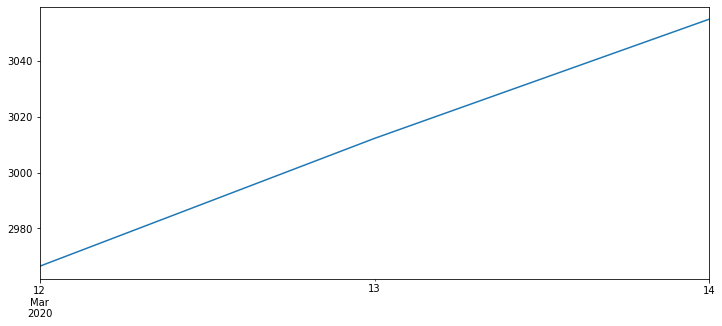

In [28]:
pred.plot(figsize=(12,5))

In [29]:
model1 =  ARIMA(data['CHOLAVARAM'], order=(4,1,2))
model1 = model1.fit()
model1.summary()
data.tail()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2020-11-29,2814.0,403.0,2819.0,3120.0
2020-11-30,2848.0,465.0,2833.0,3120.0
2020-01-12,2902.0,504.0,2841.0,3123.0
2020-02-12,2873.0,547.0,2847.0,3125.0
2020-03-12,2867.0,590.0,2878.0,3137.0


In [30]:
index_future_dates = pd.date_range(start='2020-03-12',end='2020-03-14')
#print(index_future_dates)
pred=model1.predict(start=len(data),end=len(data)+2,typ='levels').rename('ARIMA predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-03-12    598.539702
2020-03-13    616.778682
2020-03-14    633.333292
Freq: D, Name: ARIMA predictions, dtype: float64


In [32]:
model2 =  ARIMA(data['REDHILLS'], order=(1,1,2))
model2 = model2.fit()
model2.summary()
data.tail()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2020-11-29,2814.0,403.0,2819.0,3120.0
2020-11-30,2848.0,465.0,2833.0,3120.0
2020-01-12,2902.0,504.0,2841.0,3123.0
2020-02-12,2873.0,547.0,2847.0,3125.0
2020-03-12,2867.0,590.0,2878.0,3137.0


In [33]:
index_future_dates = pd.date_range(start='2020-03-12',end='2020-03-14')
#print(index_future_dates)
pred=model2.predict(start=len(data),end=len(data)+2,typ='levels').rename('ARIMA predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-03-12    2899.139214
2020-03-13    2917.511862
2020-03-14    2934.689543
Freq: D, Name: ARIMA predictions, dtype: float64


In [34]:
model3 =  ARIMA(data['CHEMBARAMBAKKAM'], order=(1,1,2))
model3 = model3.fit()
model3.summary()
data.tail()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2020-11-29,2814.0,403.0,2819.0,3120.0
2020-11-30,2848.0,465.0,2833.0,3120.0
2020-01-12,2902.0,504.0,2841.0,3123.0
2020-02-12,2873.0,547.0,2847.0,3125.0
2020-03-12,2867.0,590.0,2878.0,3137.0


In [35]:
index_future_dates = pd.date_range(start='2020-03-12',end='2020-03-14')
#print(index_future_dates)
pred=model3.predict(start=len(data),end=len(data)+2,typ='levels').rename('ARIMA predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-03-12    3150.272570
2020-03-13    3161.069135
2020-03-14    3171.464228
Freq: D, Name: ARIMA predictions, dtype: float64
